In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import glob
from scipy.special import kl_div
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import os

Load R3 dataset

In [2]:
df = pd.read_csv("R3_data.csv")
df = df.drop_duplicates(subset='ImgID', keep='first')

# print(df.head(5))
print(f"num columns : {df.shape[1]}")
print(f"num rows : {df.shape[0]}")
print(f"column list : {df.columns}")

num columns : 31
num rows : 10379
column list : Index(['Unnamed: 0', 'ID', 'Gender', 'Age', 'Handness', 'Race', 'Education',
       'Language', 'ImgID', 'Scan', 'Interval', 'Training', 'Face', 'People',
       'Place', 'Activity', 'B75_Span', 'B75_L', 'B75_R', 'B90_Span', 'B90_L',
       'B90_R', 'B95_Span', 'B95_L', 'B95_R', 'Distinc_Test',
       'Distinc_Encode40', 'Distinc_Encode60', 'Distinc_Encode70', 'A1',
       'Mem_s'],
      dtype='object')


Create csv file for each clients (16 to 62) that will contain 'ImgID' and 'Mem_s'. 

In [3]:
selected_columns = ['ID', 'ImgID', 'Mem_s']
df1 = df[selected_columns]
# Dividing the DataFrame based on the 'ID' into separate DataFrames for each unique ID
dfs_by_id = {id_: df_group for id_, df_group in df1.groupby('ID')}
# Changing the file extension from .jpg to .pt in the 'ImgID' column for each DataFrame
for id_, df_group in dfs_by_id.items():
    df_group['ImgID'] = df_group['ImgID'].str.replace('.jpg', '.pt', regex=False)


Unique Id's from the dataframe df

In [4]:
clients = df['ID'].unique()

print(f"Clients particilated in the Event memory test : {clients}")
print(f"Number of clients : {len(clients)}")

Clients particilated in the Event memory test : [16 17 18 19 22 23 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43
 44 45 46 47 48 49 51 52 53 54 55 56 57 60 61 62]
Number of clients : 40


In [5]:
# To demonstrate the change, let's print out the first few rows of each DataFrame again
for id_, df_group in dfs_by_id.items():
    print(f"DataFrame for ID {id_} after changing file extension:")
    print(df_group, "\n")


DataFrame for ID 16 after changing file extension:
     ID                          ImgID  Mem_s
0    16  NEUR16_scan1_img01_day22_S.pt      1
1    16  NEUR16_scan1_img01_day26_D.pt      1
2    16  NEUR16_scan1_img02_day19_S.pt      7
3    16  NEUR16_scan1_img02_day27_D.pt      8
4    16  NEUR16_scan1_img03_day23_S.pt      7
..   ..                            ...    ...
272  16  NEUR16_scan3_img49_day91_D.pt      2
273  16  NEUR16_scan3_img50_day56_D.pt      1
274  16  NEUR16_scan3_img50_day88_S.pt      5
275  16  NEUR16_scan3_img51_day80_D.pt      5
276  16  NEUR16_scan3_img51_day84_S.pt      8

[277 rows x 3 columns] 

DataFrame for ID 17 after changing file extension:
     ID                          ImgID  Mem_s
277  17  NEUR17_scan1_img04_day04_S.pt      4
278  17  NEUR17_scan1_img04_day10_D.pt      3
279  17  NEUR17_scan1_img05_day03_S.pt      9
280  17  NEUR17_scan1_img06_day09_D.pt      9
281  17  NEUR17_scan1_img06_day15_S.pt      3
..   ..                            ...    ..

In [7]:
# To demonstrate, let's print out the first few rows of each DataFrame by ID
for id_, df_group in dfs_by_id.items():
    print(f"DataFrame for ID {id_}:")
    df_group = df_group.drop('ID', axis=1)
    #df_group = df_group.iloc[1:, :]
    #print(df_group, "\n")
    file_name = f"Client_ID_{id_}.csv"
    # Saving the DataFrame to a CSV file
    df_group.to_csv("/proj/sourasb-220503/FedMEM/dataset/clients/mem_s/" + file_name, index=False, header=False)
    print(f"Saved DataFrame for ID {id_} to {file_name}")


DataFrame for ID 16:
Saved DataFrame for ID 16 to Client_ID_16.csv
DataFrame for ID 17:
Saved DataFrame for ID 17 to Client_ID_17.csv
DataFrame for ID 18:
Saved DataFrame for ID 18 to Client_ID_18.csv
DataFrame for ID 19:
Saved DataFrame for ID 19 to Client_ID_19.csv
DataFrame for ID 22:
Saved DataFrame for ID 22 to Client_ID_22.csv
DataFrame for ID 23:
Saved DataFrame for ID 23 to Client_ID_23.csv
DataFrame for ID 25:
Saved DataFrame for ID 25 to Client_ID_25.csv
DataFrame for ID 26:
Saved DataFrame for ID 26 to Client_ID_26.csv
DataFrame for ID 27:
Saved DataFrame for ID 27 to Client_ID_27.csv
DataFrame for ID 28:
Saved DataFrame for ID 28 to Client_ID_28.csv
DataFrame for ID 29:
Saved DataFrame for ID 29 to Client_ID_29.csv
DataFrame for ID 30:
Saved DataFrame for ID 30 to Client_ID_30.csv
DataFrame for ID 31:
Saved DataFrame for ID 31 to Client_ID_31.csv
DataFrame for ID 32:
Saved DataFrame for ID 32 to Client_ID_32.csv
DataFrame for ID 33:
Saved DataFrame for ID 33 to Client_ID_33

Create csv file for each clients (16 to 62) that will contain 'ImgID' and 'A1'. 

In [8]:
selected_columns = ['ID', 'ImgID', 'A1']
df1 = df[selected_columns]
# Dividing the DataFrame based on the 'ID' into separate DataFrames for each unique ID
dfs_by_id = {id_: df_group for id_, df_group in df1.groupby('ID')}
# Changing the file extension from .jpg to .pt in the 'ImgID' column for each DataFrame
for id_, df_group in dfs_by_id.items():
    df_group['ImgID'] = df_group['ImgID'].str.replace('.jpg', '.pt', regex=False)

In [9]:
clients = df['ID'].unique()

print(f"Clients particilated in the Event memory test : {clients}")
print(f"Number of clients : {len(clients)}")

Clients particilated in the Event memory test : [16 17 18 19 22 23 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43
 44 45 46 47 48 49 51 52 53 54 55 56 57 60 61 62]
Number of clients : 40


In [12]:
# To demonstrate, let's print out the first few rows of each DataFrame by ID
for id_, df_group in dfs_by_id.items():
    print(f"DataFrame for ID {id_}:")
    df_group = df_group.drop('ID', axis=1)
    #df_group = df_group.iloc[1:, :]
    #print(df_group, "\n")
    file_name = f"Client_ID_{id_}.csv"
    # Saving the DataFrame to a CSV file
    df_group.to_csv("/proj/sourasb-220503/FedMEM/dataset/clients/A1/" + file_name, index=False, header=False)
    print(f"Saved DataFrame for ID {id_} to {file_name}")

DataFrame for ID 16:
Saved DataFrame for ID 16 to Client_ID_16.csv
DataFrame for ID 17:
Saved DataFrame for ID 17 to Client_ID_17.csv
DataFrame for ID 18:
Saved DataFrame for ID 18 to Client_ID_18.csv
DataFrame for ID 19:
Saved DataFrame for ID 19 to Client_ID_19.csv
DataFrame for ID 22:
Saved DataFrame for ID 22 to Client_ID_22.csv
DataFrame for ID 23:
Saved DataFrame for ID 23 to Client_ID_23.csv
DataFrame for ID 25:
Saved DataFrame for ID 25 to Client_ID_25.csv
DataFrame for ID 26:
Saved DataFrame for ID 26 to Client_ID_26.csv
DataFrame for ID 27:
Saved DataFrame for ID 27 to Client_ID_27.csv
DataFrame for ID 28:
Saved DataFrame for ID 28 to Client_ID_28.csv
DataFrame for ID 29:
Saved DataFrame for ID 29 to Client_ID_29.csv
DataFrame for ID 30:
Saved DataFrame for ID 30 to Client_ID_30.csv
DataFrame for ID 31:
Saved DataFrame for ID 31 to Client_ID_31.csv
DataFrame for ID 32:
Saved DataFrame for ID 32 to Client_ID_32.csv
DataFrame for ID 33:
Saved DataFrame for ID 33 to Client_ID_33

How many samples that each client has ?

In [7]:
# Display statistics on the sample size of each DataFrame
sample_sizes = {id_: len(df_group) for id_, df_group in dfs_by_id.items()}
# print(sample_sizes)
print(sample_sizes)

{16: 277, 17: 270, 18: 276, 19: 282, 22: 271, 23: 272, 25: 275, 26: 182, 27: 267, 28: 277, 29: 277, 30: 272, 31: 275, 32: 275, 33: 272, 34: 272, 35: 282, 36: 282, 37: 273, 38: 268, 39: 264, 41: 264, 42: 229, 43: 271, 44: 274, 45: 247, 46: 271, 47: 252, 48: 261, 49: 276, 51: 278, 52: 269, 53: 247, 54: 261, 55: 274, 56: 256, 57: 238, 60: 190, 61: 181, 62: 179}


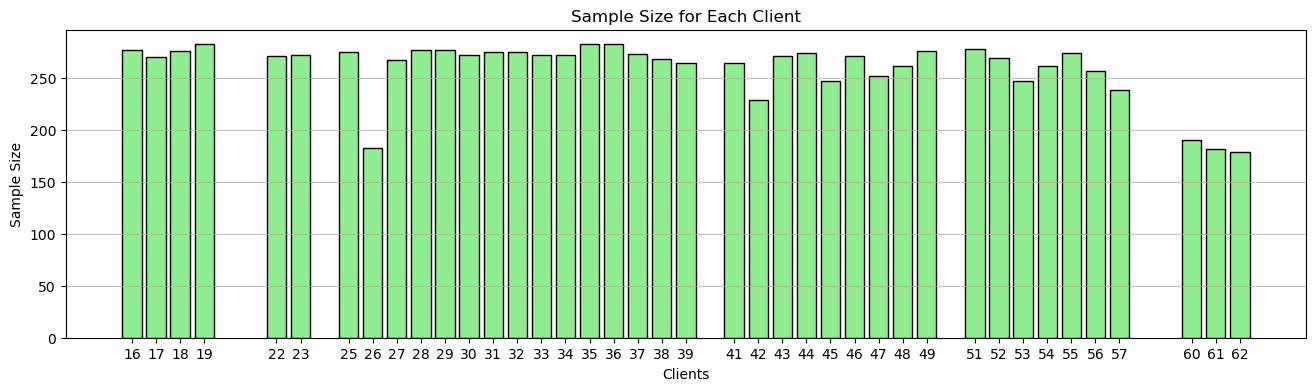

In [8]:
# Plotting the sample sizes for each ID
plt.figure(figsize=(16, 4))
plt.bar(sample_sizes.keys(), sample_sizes.values(), color='lightgreen', edgecolor='black')
plt.xlabel('Clients')
plt.ylabel('Sample Size')
plt.title('Sample Size for Each Client')
plt.xticks(list(sample_sizes.keys()))
plt.grid(axis='y', alpha=0.75)

plt.show()

Perform some data analysis on the R3 data



In [9]:
selected_columns = ['ID', 'Age', 'ImgID', 'A1', 'Mem_s']
new_df = df[selected_columns]
print(new_df)

       ID  Age                           ImgID  A1  Mem_s
0      16   71  NEUR16_scan1_img01_day22_S.jpg   1      1
1      16   71  NEUR16_scan1_img01_day26_D.jpg   1      1
2      16   71  NEUR16_scan1_img02_day19_S.jpg   2      7
3      16   71  NEUR16_scan1_img02_day27_D.jpg   2      8
4      16   71  NEUR16_scan1_img03_day23_S.jpg   2      7
...    ..  ...                             ...  ..    ...
10644  62   61  NEUR62_scan3_img52_day66_D.jpg   0      4
10646  62   61  NEUR62_scan3_img53_day58_S.jpg   1      1
10648  62   61  NEUR62_scan3_img53_day77_D.jpg   0      4
10650  62   61  NEUR62_scan3_img54_day68_S.jpg   0      3
10652  62   61  NEUR62_scan3_img54_day71_D.jpg   0      2

[10379 rows x 5 columns]


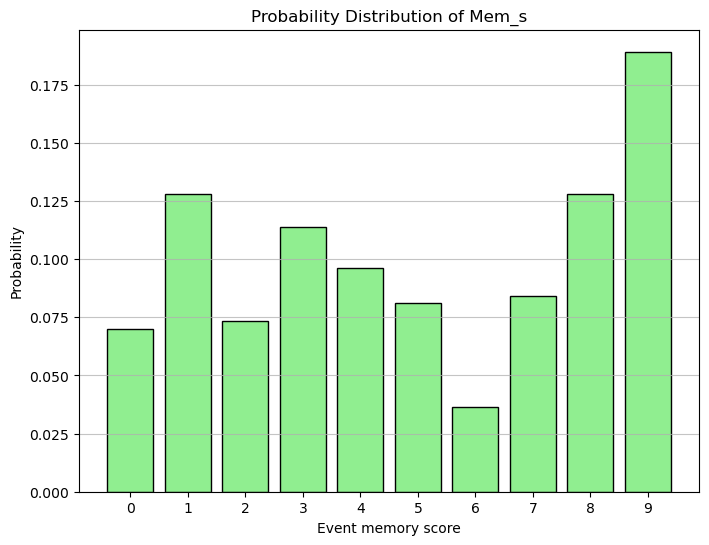

In [10]:
distribution = new_df['Mem_s'].value_counts().sort_index()
# print(distribution)

total = distribution.sum()

probability_distribution = distribution/total

# print(probability_distribution)

# Plotting the histogram of the probability distribution of 'Mem_s' values

plt.figure(figsize=(8, 6))
# Since we're dealing with a probability distribution, we use the index for bins and values for heights
plt.bar(probability_distribution.index, probability_distribution.values, color='lightgreen', edgecolor='black')
plt.title('Probability Distribution of Mem_s')
plt.xlabel('Event memory score')
plt.ylabel('Probability')
plt.xticks(probability_distribution.index)
plt.grid(axis='y', alpha=0.75)

plt.show()

In [34]:
print(dfs_by_id)

{16:      ID                          ImgID  A1
0    16  NEUR16_scan1_img01_day22_S.pt   1
1    16  NEUR16_scan1_img01_day26_D.pt   1
2    16  NEUR16_scan1_img02_day19_S.pt   2
3    16  NEUR16_scan1_img02_day27_D.pt   2
4    16  NEUR16_scan1_img03_day23_S.pt   2
..   ..                            ...  ..
272  16  NEUR16_scan3_img49_day91_D.pt   0
273  16  NEUR16_scan3_img50_day56_D.pt   1
274  16  NEUR16_scan3_img50_day88_S.pt   0
275  16  NEUR16_scan3_img51_day80_D.pt   0
276  16  NEUR16_scan3_img51_day84_S.pt   2

[277 rows x 3 columns], 17:      ID                          ImgID  A1
277  17  NEUR17_scan1_img04_day04_S.pt   0
278  17  NEUR17_scan1_img04_day10_D.pt   0
279  17  NEUR17_scan1_img05_day03_S.pt   2
280  17  NEUR17_scan1_img06_day09_D.pt   2
281  17  NEUR17_scan1_img06_day15_S.pt   0
..   ..                            ...  ..
542  17  NEUR17_scan3_img49_day64_S.pt   1
543  17  NEUR17_scan3_img49_day68_D.pt   0
544  17  NEUR17_scan3_img50_day69_D.pt   0
545  17  NEUR17_scan

In [37]:
folder_path = '/proj/sourasb-220503/FedMEM/dataset/histogram/A1'  # Specify your folder path here
os.makedirs(folder_path, exist_ok=True)  # Create the folder if it doesn't exist
# Plotting the distribution of 'Mem_s' for each divided DataFrame
# fig, axes = plt.subplots(nrows=len(dfs_by_id), ncols=1, figsize=(8, 6*len(dfs_by_id)))
# fig.tight_layout(pad=6.0)

if len(dfs_by_id) == 1:  # Adjusting for the case when there's only one subplot (avoiding indexing error)
    axes = [axes]

for id_, df_group in dfs_by_id.items():
    da_group = df_group['A1'].value_counts().sort_index()
    plt.figure(figsize=(8, 6))  # Create a new figure for each histogram
    plt.hist(df_group['A1'], bins=range(min(df_group['A1']), max(df_group['A1']) + 2), align='left', color='skyblue', edgecolor='black')
    #plt.title(f'Distribution of Mem_s for ID {id_}')
    plt.xlabel('Memory score', fontsize=24)
    plt.ylabel('Frequency', fontsize=24)
    plt.grid(axis='y', alpha=0.75)
    
    # Save the figure
    file_name = f'histogram_ID_{id_}.png'  # Define a unique file name for each histogram
    file_path = os.path.join(folder_path, file_name)  # Construct the full file path
    plt.savefig(file_path)  # Save the figure to the specified file path
    plt.close()  # Close the figure to free memory


# plt.show()

KL divergence between clients

In [54]:
 # Assuming you have a list of file paths
folder_paths = '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/*.csv'
# print(folder_paths)
file_paths = glob.glob(folder_paths)
print(file_paths)
# Read each CSV into a DataFrame and store in a list
dfs = [pd.read_csv(path) for path in file_paths]
# dfs

# Extract only the filenames
filenames = [os.path.basename(file_path) for file_path in file_paths]
print(filenames)

['/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_62.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_17.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_22.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_28.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_26.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_46.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_36.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_31.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_34.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_43.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_54.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_18.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_30.csv', '/proj/sourasb-220503/FedMEM/dataset/clients/cbd/A1/Client_ID_61.csv', '/pro

In [89]:
# Calculate the normalized class distribution for each DataFrame
class_distributions = [df['A1'].value_counts(normalize=True) for df in dfs]
print(class_distributions)

[0    0.446927
2    0.335196
1    0.217877
Name: A1, dtype: float64, 0    0.714815
2    0.222222
1    0.062963
Name: A1, dtype: float64, 2    0.645756
0    0.236162
1    0.118081
Name: A1, dtype: float64, 2    0.523466
0    0.379061
1    0.097473
Name: A1, dtype: float64, 2    0.730769
0    0.148352
1    0.120879
Name: A1, dtype: float64, 2    0.402214
0    0.335793
1    0.261993
Name: A1, dtype: float64, 2    0.453901
0    0.368794
1    0.177305
Name: A1, dtype: float64, 0    0.458182
1    0.309091
2    0.232727
Name: A1, dtype: float64, 0    0.426471
2    0.419118
1    0.154412
Name: A1, dtype: float64, 2    0.490775
0    0.291513
1    0.217712
Name: A1, dtype: float64, 2    0.421456
1    0.413793
0    0.164751
Name: A1, dtype: float64, 0    0.648551
1    0.231884
2    0.119565
Name: A1, dtype: float64, 2    0.488971
0    0.338235
1    0.172794
Name: A1, dtype: float64, 0    0.419890
2    0.298343
1    0.281768
Name: A1, dtype: float64, 0    0.569343
2    0.244526
1    0.186131
Name:

In [82]:
# Ensure all distributions cover the same set of classes
all_classes = sorted(set.union(*(set(dist.index) for dist in class_distributions)))
class_distributions = [dist.reindex(all_classes, fill_value=0) for dist in class_distributions]

# Function to compute KL Divergence, handling zeros by adding a small constant
def compute_kl_div(p, q):
    epsilon = 1e-10
    p = np.array(p) + epsilon
    q = np.array(q) + epsilon
    return kl_div(p, q).sum()

# Compute KL Divergence for each pair of distributions
kl_matrix = np.zeros((len(dfs), len(dfs)))

for i in range(len(dfs)):
    for j in range(len(dfs)):
        kl_matrix[i, j] = compute_kl_div(class_distributions[i], class_distributions[j])

In [83]:
# Display the similarity matrix
print(filenames)
client_ids = [int(filename.split('_')[-1].replace('.csv', '')) for filename in filenames]

kl_matrix_df = pd.DataFrame(kl_matrix, index=client_ids, columns=client_ids)
kl_matrix_df


['Client_ID_62.csv', 'Client_ID_17.csv', 'Client_ID_22.csv', 'Client_ID_28.csv', 'Client_ID_26.csv', 'Client_ID_46.csv', 'Client_ID_36.csv', 'Client_ID_31.csv', 'Client_ID_34.csv', 'Client_ID_43.csv', 'Client_ID_54.csv', 'Client_ID_18.csv', 'Client_ID_30.csv', 'Client_ID_61.csv', 'Client_ID_55.csv', 'Client_ID_41.csv', 'Client_ID_51.csv', 'Client_ID_32.csv', 'Client_ID_52.csv', 'Client_ID_53.csv', 'Client_ID_25.csv', 'Client_ID_33.csv', 'Client_ID_42.csv', 'Client_ID_49.csv', 'Client_ID_47.csv', 'Client_ID_60.csv', 'Client_ID_19.csv', 'Client_ID_57.csv', 'Client_ID_37.csv', 'Client_ID_23.csv', 'Client_ID_44.csv', 'Client_ID_27.csv', 'Client_ID_35.csv', 'Client_ID_48.csv', 'Client_ID_39.csv', 'Client_ID_38.csv', 'Client_ID_56.csv', 'Client_ID_29.csv', 'Client_ID_45.csv', 'Client_ID_16.csv']


,62,17,22,28,26,46,36,31,34,43,...,44,27,35,48,39,38,56,29,45,16
62,0.000000,0.198357,0.198756,0.099443,0.359990,0.026507,0.029157,0.034987,0.021061,0.063342,...,0.090007,0.044265,0.372122,0.011236,0.146042,0.179761,0.786370,0.133429,0.039149,0.028758
17,0.166194,0.000000,0.515013,0.235510,0.818397,0.318446,0.249155,0.207475,0.171711,0.386963,...,0.228547,0.363341,0.659903,0.100532,0.314309,0.461927,1.554986,0.071071,0.048774,0.116577
22,0.200454,0.501559,0.000000,0.046478,0.027171,0.128498,0.074395,0.388889,0.107889,0.055250,...,0.049358,0.219930,0.028865,0.285169,0.671912,0.001253,0.198117,0.195264,0.307815,0.389807
28,0.092505,0.250652,0.050767,0.000000,0.159983,0.087494,0.026734,0.239976,0.026864,0.054974,...,0.000209,0.166813,0.111143,0.132569,0.473558,0.035673,0.499585,0.054501,0.131729,0.212368
26,0.334731,0.715491,0.024235,0.130648,0.000000,0.221659,0.166603,0.555388,0.220020,0.119594,...,0.135805,0.324764,0.026309,0.447461,0.876298,0.035240,0.066802,0.335534,0.481515,0.571188
46,0.025616,0.358476,0.136561,0.112366,0.236804,0.000000,0.022190,0.072391,0.041685,0.015950,...,0.103200,0.015137,0.306568,0.069933,0.200527,0.131111,0.533458,0.224914,0.124721,0.095881
36,0.030205,0.263682,0.076433,0.031231,0.187610,0.020218,0.000000,0.124633,0.007113,0.014870,...,0.026591,0.066821,0.193538,0.068890,0.302159,0.064838,0.519114,0.107108,0.093754,0.120093
31,0.034576,0.298761,0.363574,0.254917,0.540577,0.066159,0.115755,0.000000,0.110465,0.141864,...,0.239297,0.043166,0.609319,0.036860,0.036532,0.346044,0.985002,0.298779,0.091379,0.016429
34,0.020500,0.184175,0.112303,0.028116,0.255133,0.037564,0.007206,0.108809,0.000000,0.043055,...,0.023336,0.085526,0.231152,0.042017,0.277469,0.093678,0.653962,0.063222,0.052934,0.088847
43,0.062387,0.397475,0.059892,0.066750,0.129631,0.016134,0.014479,0.158060,0.041347,0.000000,...,0.061672,0.056744,0.181987,0.123506,0.340062,0.058004,0.371425,0.199072,0.170041,0.176797


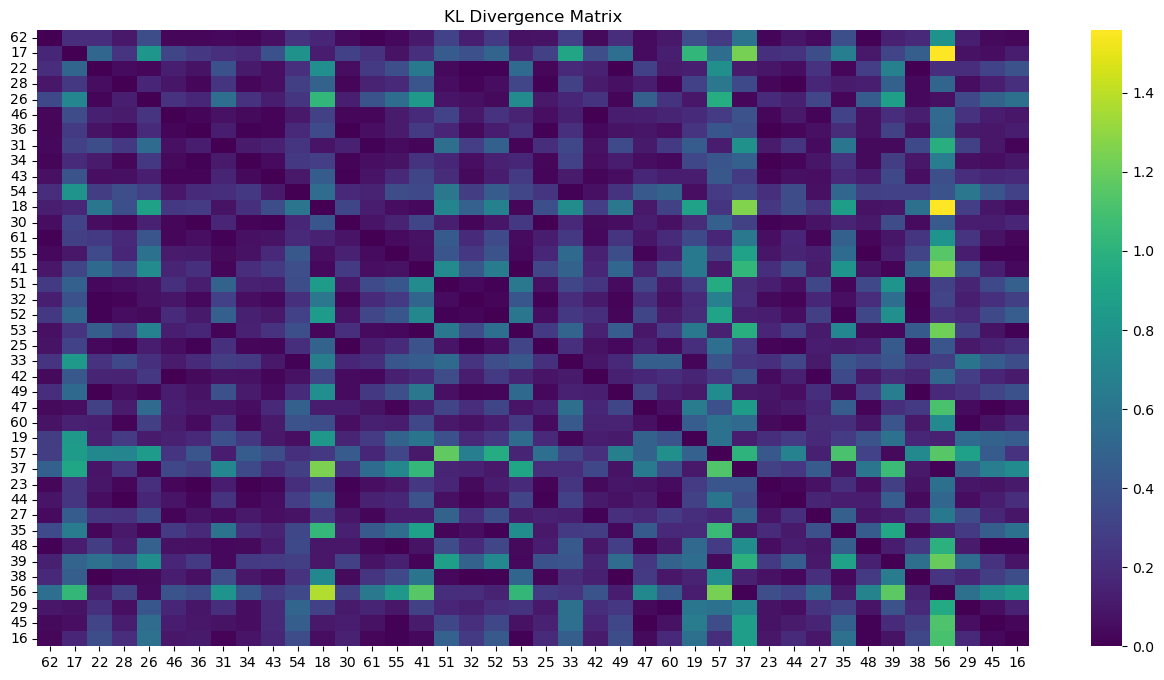

In [59]:

plt.figure(figsize=(16, 8))
sns.heatmap(kl_matrix_df, annot=False, cmap='viridis')
plt.title('KL Divergence Matrix')
plt.show()

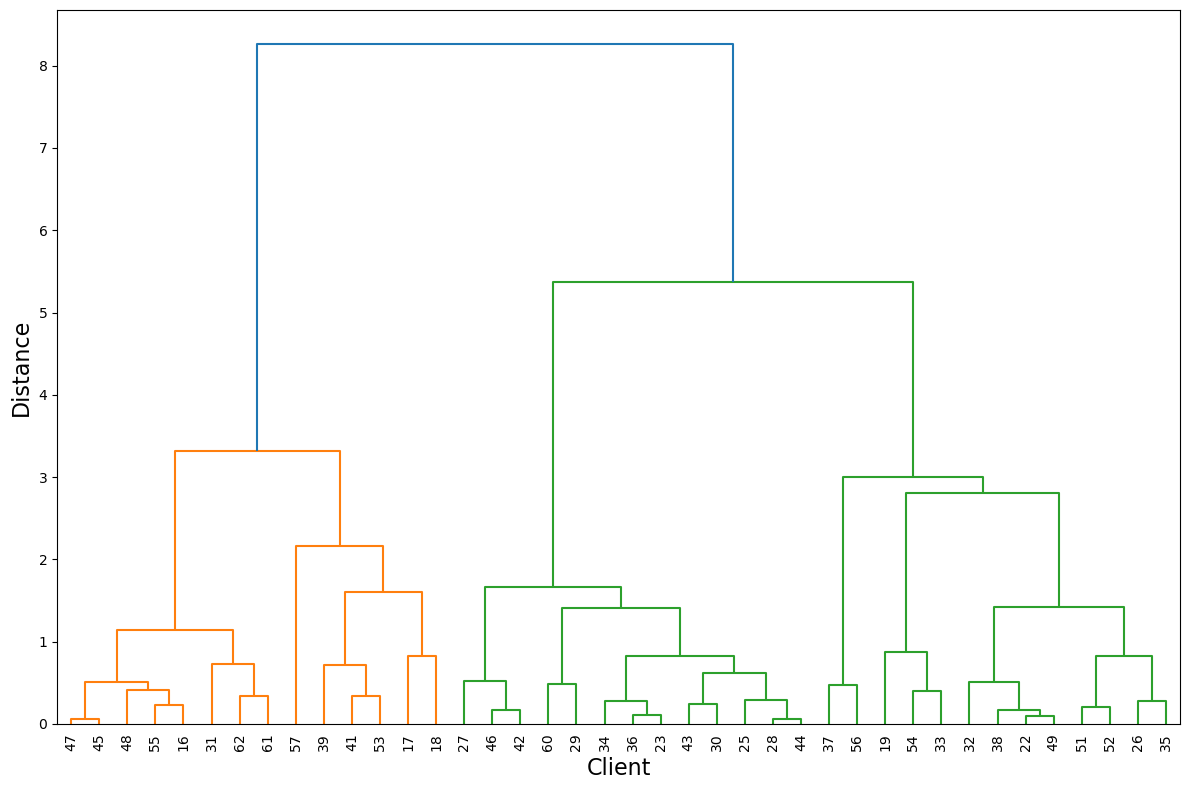

In [60]:

# Generate the linkage matrix using 'ward' linkage method to minimize variance within clusters
Z = linkage(kl_matrix_df, method='ward')

# Plot the dendrogram to visualize the cluster formation
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=kl_matrix_df.index, leaf_rotation=90, leaf_font_size=10)
#plt.title("Dendrogram",fontsize=16)
plt.xlabel("Client", fontsize=16)
plt.ylabel("Distance", fontsize=16)
plt.tight_layout()
plt.show()

Visualizing clients clusters using spectral clustering

[4 1 2 4 2 4 4 0 4 4 3 1 4 0 1 0 2 4 2 0 4 3 3 2 1 4 3 0 2 4 4 3 2 1 0 2 2
 1 1 0]


/home/x_souba/anaconda3/envs/personalized_fl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:248: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


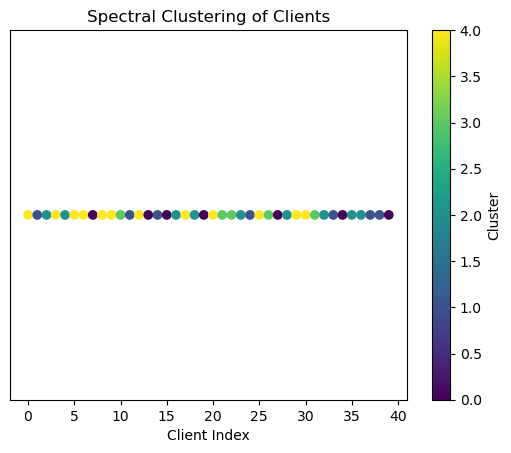

In [30]:
from sklearn.cluster import SpectralClustering

# Convert the KL divergence matrix to a similarity matrix
similarity_matrix = np.exp(-kl_matrix_df)
np.fill_diagonal(similarity_matrix.values, 1)

# Choose the number of clusters
n_clusters = 5  # Adjust based on your specific needs

# Apply Spectral Clustering
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', n_init=100, assign_labels='discretize')
clusters = sc.fit_predict(similarity_matrix)

print(clusters)

# Print cluster assignments
# for i, cluster in enumerate(clusters):
#    print(f"Client {kl_matrix_df.index[i]} assigned to cluster: {cluster}")

# Assuming you have a way to represent each client in 2D (e.g., via MDS or t-SNE on the original distance matrix)
# Here, just an example placeholder
x = np.arange(len(clusters))  # Placeholder for actual 2D representations

plt.scatter(x, np.zeros_like(x), c=clusters, cmap='viridis')
plt.title('Spectral Clustering of Clients')
plt.xlabel('Client Index')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()


t-sne